<a href="https://colab.research.google.com/github/filipebvs/calculo_preco_medio/blob/main/Calculo_de_pre%C3%A7o_m%C3%A9dio_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ativo: AFHI11
Quantidade Atual: 105
Preço Médio Final: 93.20654867256637

Ativo: BIDB11
Quantidade Atual: 181
Preço Médio Final: 90.08999999999999

Ativo: BODB11
Quantidade Atual: 1780
Preço Médio Final: 9.375129213483145

Ativo: BTCI11
Quantidade Atual: 1201
Preço Médio Final: 9.439676148796497

Ativo: BTLG11
Quantidade Atual: 0
Preço Médio Final: 0

Ativo: CVBI11
Quantidade Atual: 107
Preço Médio Final: 92.22867724867726

Ativo: FGAA11
Quantidade Atual: 2539
Preço Médio Final: 9.834302724908252

Ativo: HGCR11
Quantidade Atual: 0
Preço Médio Final: 0

Ativo: KNCR11
Quantidade Atual: 0
Preço Médio Final: 0

Ativo: KNHF11
Quantidade Atual: 122
Preço Médio Final: 104.72016393442624

Ativo: MCCI11
Quantidade Atual: 0
Preço Médio Final: 0

Ativo: MCHF11
Quantidade Atual: 1926
Preço Médio Final: 8.765681042236992

Ativo: MCHY11
Quantidade Atual: 440
Preço Médio Final: 10.03

Ativo: RBHG11
Quantidade Atual: 190
Preço Médio Final: 82.77630769230771

Ativo: RBRR11
Quantidade Atual: 0
Preço Méd

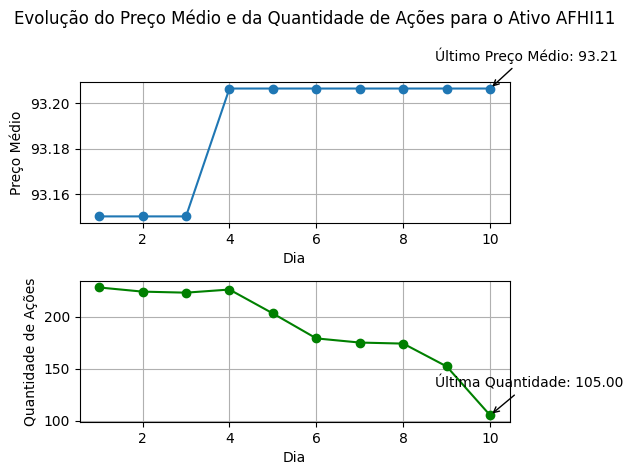

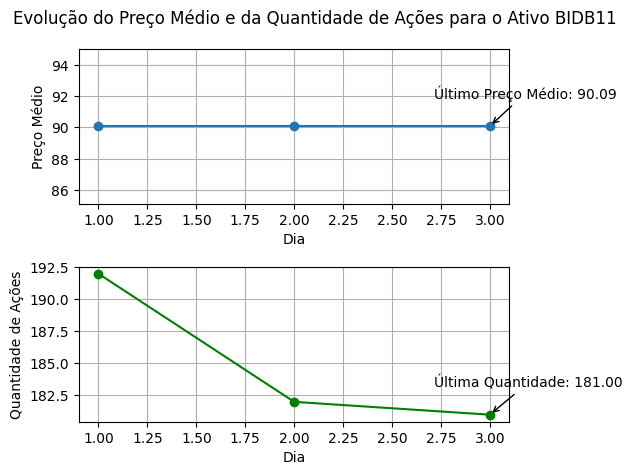

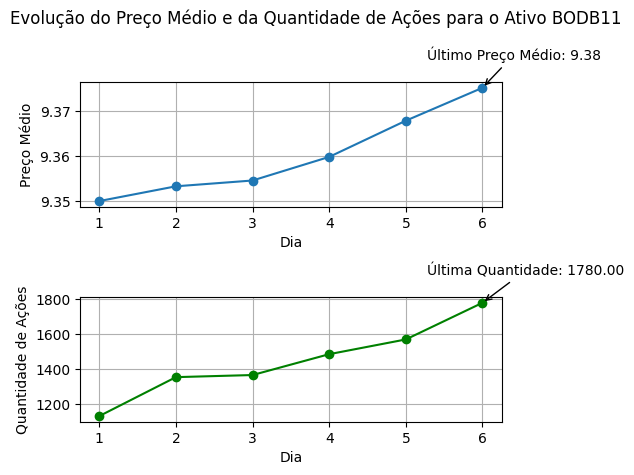

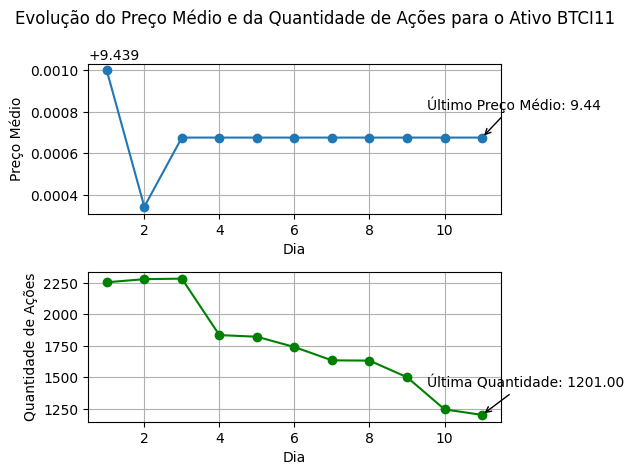

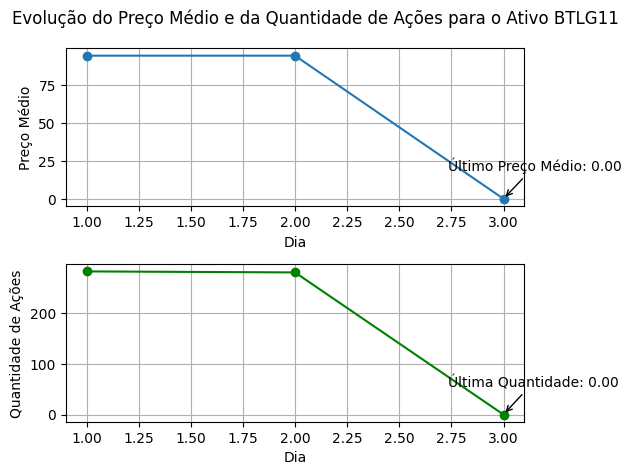

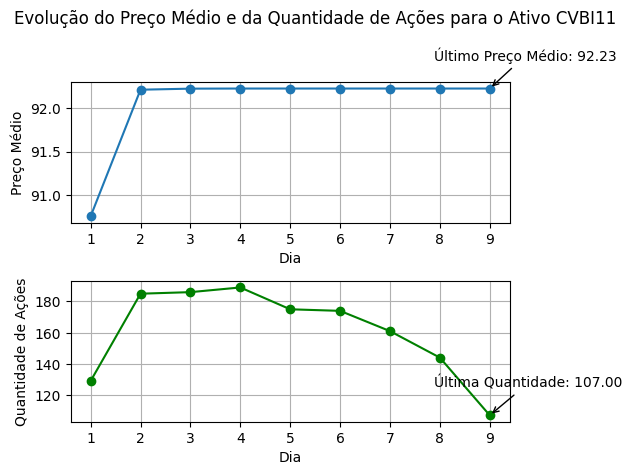

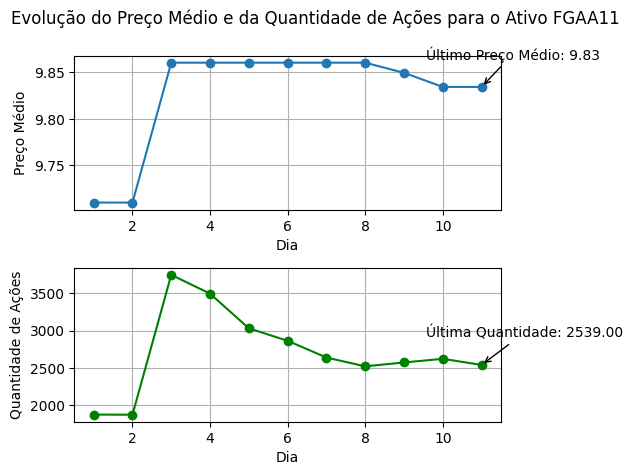

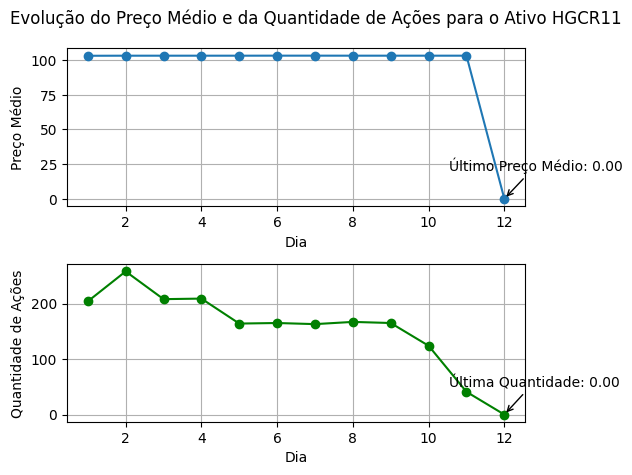

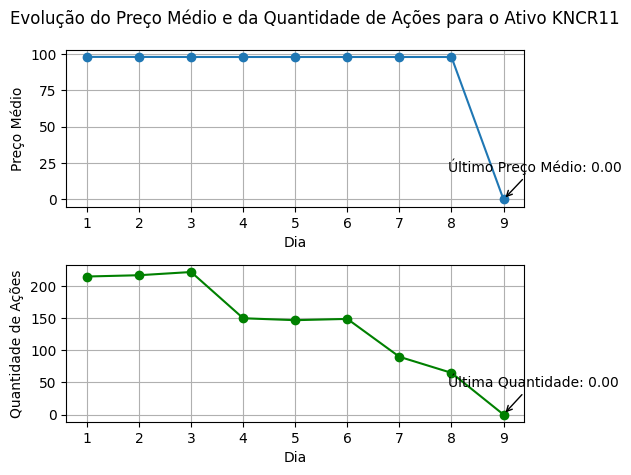

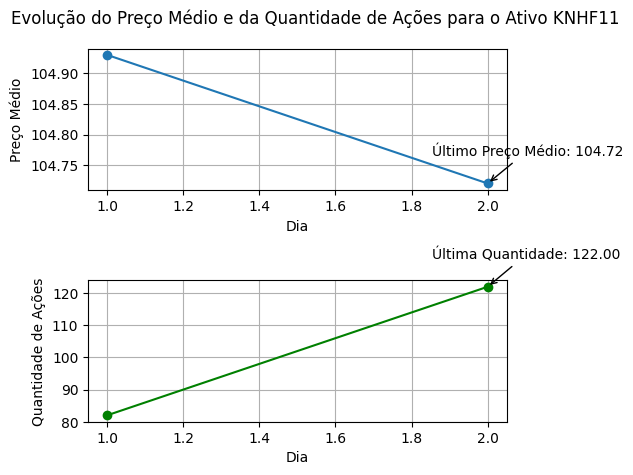

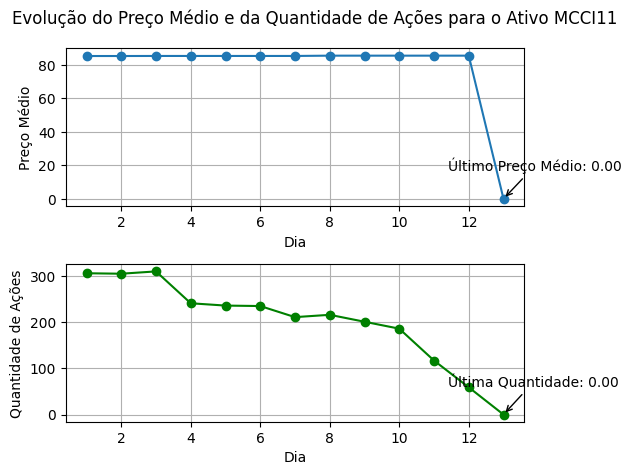

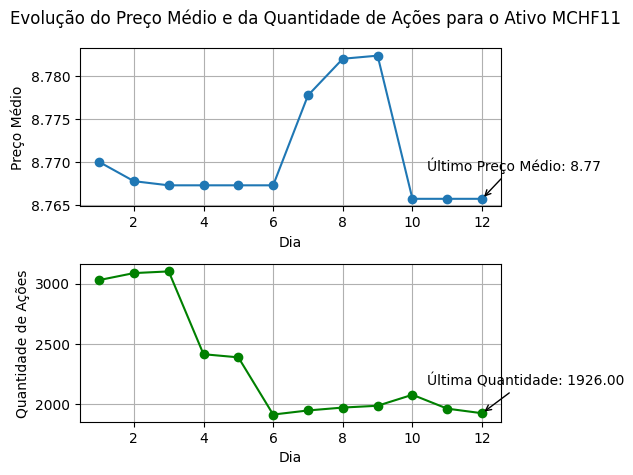

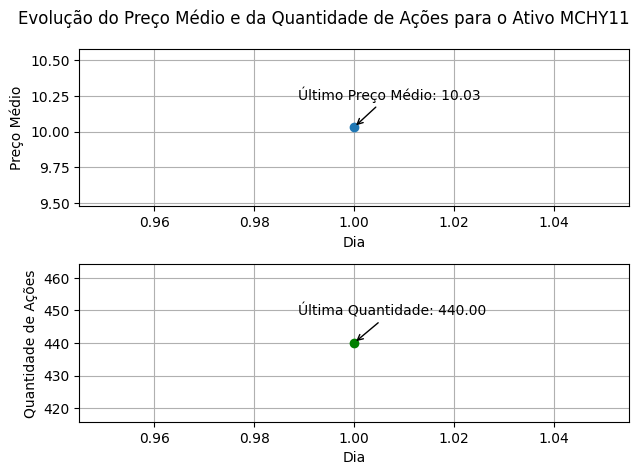

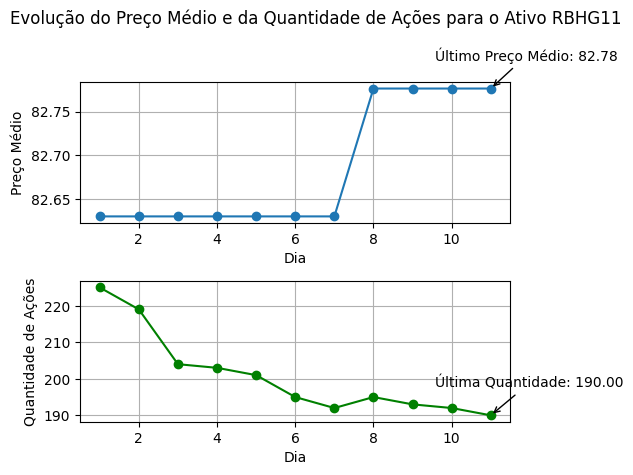

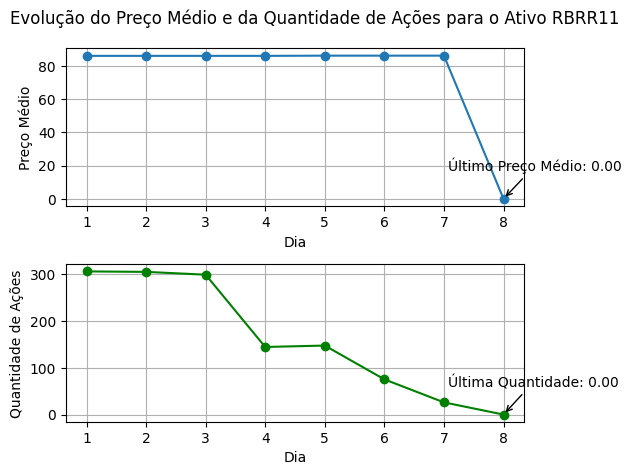

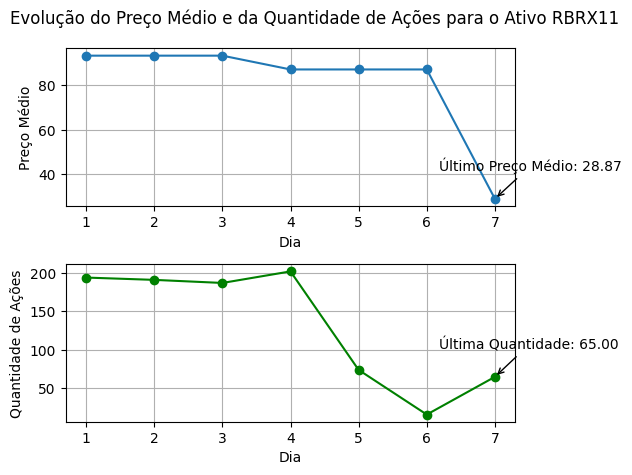

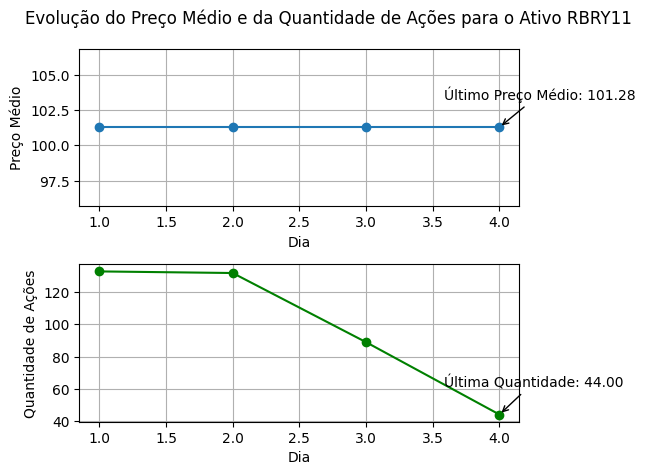

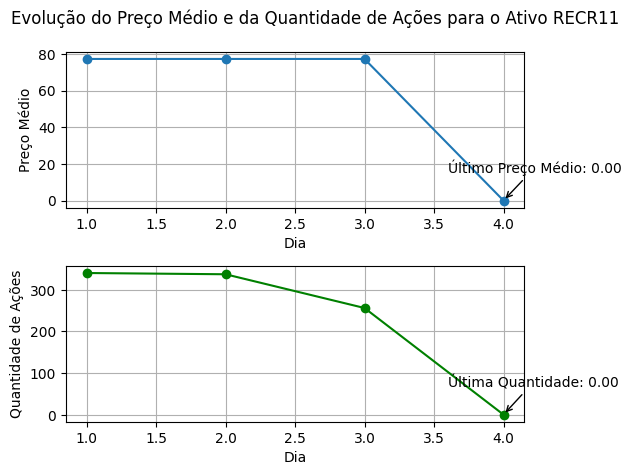

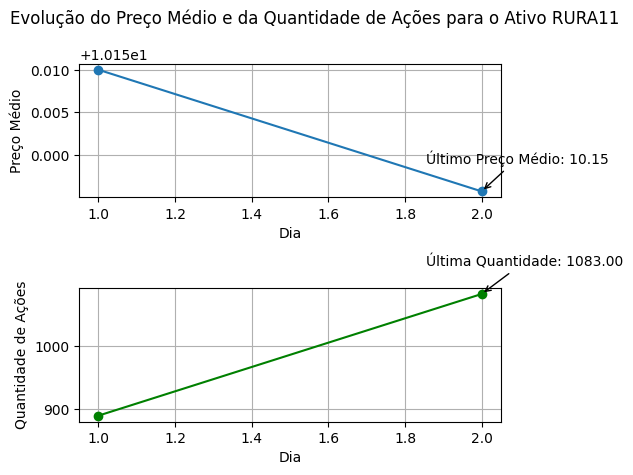

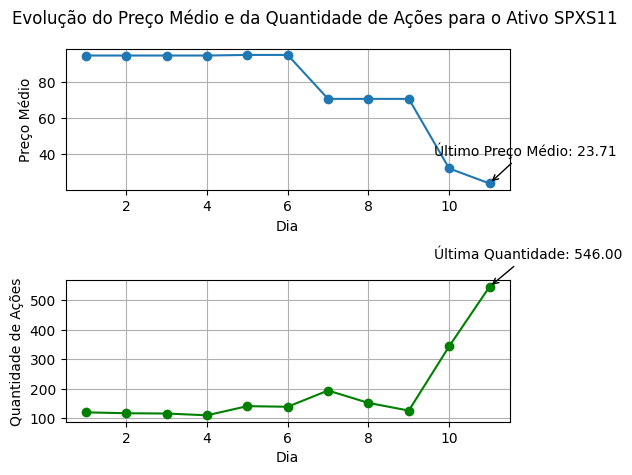

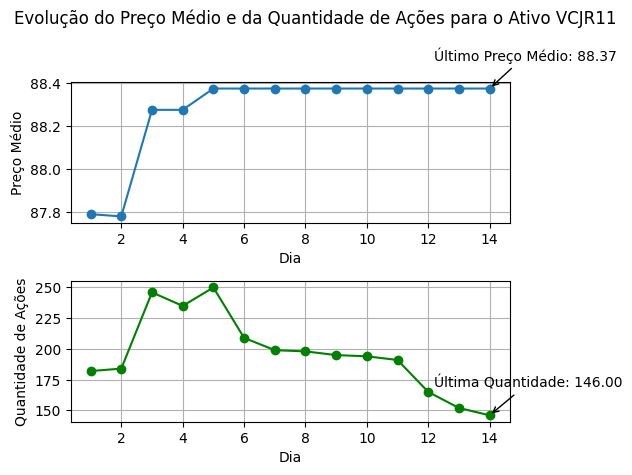

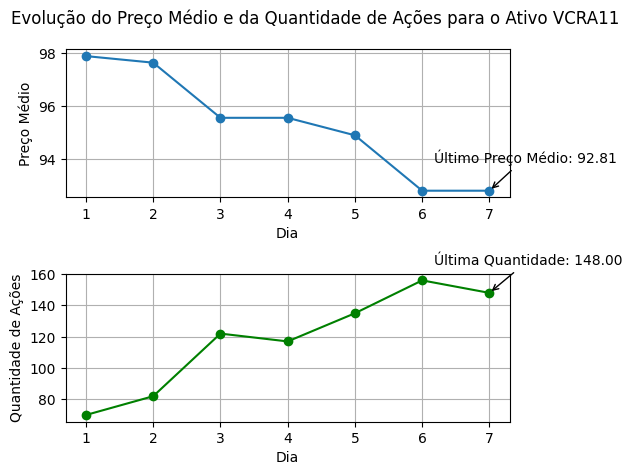

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar as negociações do arquivo Excel
negociacoes = pd.read_excel("/content/Historico_Execucoes_18_04_2024 - 23h29.xlsx")

# Ordenar as negociações por data
negociacoes = negociacoes.sort_values(by=['Ativo', 'Data'])

# Inicializar as variáveis para acompanhar o custo total e a quantidade total de ações por ativo
preco_medio_por_ativo = {}
quantidade_por_ativo = {}

# Iterar sobre cada ativo na base de dados
for ativo, grupo in negociacoes.groupby('Ativo'):
    custo_total = 0
    quantidade_total = 0
    preco_medio_por_dia = []
    quantidade_por_dia = []

    # Agrupar as negociações por dia e calcular o preço médio e a quantidade total para o ativo atual
    for data, grupo_dia in grupo.groupby('Data'):
        preco_medio = custo_total / quantidade_total if quantidade_total != 0 else 0  # Calcular o preço médio antes de qualquer transação
        for index, row in grupo_dia.iterrows():
            if row['Tipo'] == 'Compra':
                # Se for uma transação de compra, atualizar o custo total e a quantidade total de ações
                custo_total += row['Preço'] * row['Quantidade']
                quantidade_total += row['Quantidade']
            elif row['Tipo'] == 'Venda':
                # Se for uma transação de venda, calcular o preço médio antes da venda
                custo_total -= row['Quantidade'] * preco_medio
                quantidade_total -= row['Quantidade']
            # Garantir que a posição não seja menor que 0
            quantidade_total = max(quantidade_total, 0)
            # Atualizar o preço médio após qualquer transação
            preco_medio = custo_total / quantidade_total if quantidade_total != 0 else 0
            # Adicionar o preço médio à lista de preços médios por dia
            preco_medio_por_dia.append(preco_medio)
            # Adicionar a quantidade total de ações à lista de quantidades por dia
            quantidade_por_dia.append(quantidade_total)

    # Salvar os resultados para o ativo atual
    preco_medio_por_ativo[ativo] = preco_medio_por_dia
    quantidade_por_ativo[ativo] = quantidade_por_dia

    # Calcular a quantidade atual e o preço médio final
    quantidade_atual = quantidade_total
    preco_medio_final = preco_medio

    # Exibir a quantidade atual e o preço médio final em um DataFrame
    print(f"Ativo: {ativo}")
    print(f"Quantidade Atual: {quantidade_atual}")
    print(f"Preço Médio Final: {preco_medio_final}\n")

    # Criar um DataFrame com as informações de posição e quantidade
    df_posicao = pd.DataFrame({'Ativo': [ativo],
                               'Quantidade Atual': [quantidade_atual],
                               'Preço Médio Final': [preco_medio_final]})

    # Exibir o DataFrame como tabela
    df_posicao.head(50)

# Plotar o resultado para cada ativo
for ativo, preco_medio_por_dia in preco_medio_por_ativo.items():
    quantidade_por_dia = quantidade_por_ativo[ativo]

    # Obter as datas para o eixo x
    datas = list(grupo['Data'].unique())

    # Plotar os gráficos
    fig, axs = plt.subplots(2)
    fig.suptitle(f'Evolução do Preço Médio e da Quantidade de Ações para o Ativo {ativo}')

    # Gráfico da evolução do preço médio
    dias = range(1, len(preco_medio_por_dia) + 1)
    axs[0].plot(dias, preco_medio_por_dia, marker='o')
    axs[0].set_xlabel('Dia')
    axs[0].set_ylabel('Preço Médio')
    axs[0].grid(True)
    # Adicionar anotação com o último valor de preço médio
    axs[0].annotate(f'Último Preço Médio: {preco_medio_por_dia[-1]:.2f}', xy=(len(preco_medio_por_dia), preco_medio_por_dia[-1]), xytext=(-40, 20), textcoords='offset points', arrowprops=dict(arrowstyle="->"))

    # Gráfico da evolução da quantidade de ações
    axs[1].plot(dias, quantidade_por_dia, marker='o', color='green')
    axs[1].set_xlabel('Dia')
    axs[1].set_ylabel('Quantidade de Ações')
    axs[1].grid(True)
    # Adicionar anotação com o último valor de quantidade
    axs[1].annotate(f'Última Quantidade: {quantidade_por_dia[-1]:.2f}', xy=(len(quantidade_por_dia), quantidade_por_dia[-1]), xytext=(-40, 20), textcoords='offset points', arrowprops=dict(arrowstyle="->"))

    # Ajustar o layout para evitar sobreposição de rótulos
    plt.tight_layout()

    # Exibir os gráficos
    plt.show()
